### Timer Log

1) Implement a decorator that log the execution time of a function

In [9]:
import logging
import time
from functools import wraps
import logging
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt

In [10]:
logger = logging.getLogger(__name__)
#setup
logger.setLevel("DEBUG")
handler = logging.StreamHandler()
log_format = "%(asctime)s %(levelname)s -- %(message)s"
formatter = logging.Formatter(log_format)
handler.setFormatter(formatter)
logger.addHandler(handler)

In [11]:
def timed(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        logger.debug("{} ran in {}s".format(func.__name__, round(end - start, 2)))
        return result
    return wrapper

Count the number of appearances of each word in this text: using a DICTIONARY

In [12]:
@timed
def dict_count(file):
    counts = dict()
    words = re.findall(r'\w+', open(file).read().lower())
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

In [13]:
dict_count('Shakespear.txt')

2023-01-07 15:30:14,441 DEBUG -- dict_count ran in 0.28s
2023-01-07 15:30:14,441 DEBUG -- dict_count ran in 0.28s


{'this': 5233,
 'is': 7474,
 'the': 22082,
 '100th': 1,
 'etext': 188,
 'file': 19,
 'presented': 14,
 'by': 3457,
 'project': 188,
 'gutenberg': 180,
 'and': 20654,
 'in': 8697,
 'cooperation': 2,
 'with': 6154,
 'world': 727,
 'library': 173,
 'inc': 168,
 'from': 2078,
 'their': 1629,
 'of': 14628,
 'future': 13,
 'shakespeare': 201,
 'cdroms': 1,
 'often': 85,
 'releases': 1,
 'etexts': 8,
 'that': 8842,
 'are': 2994,
 'not': 6584,
 'placed': 10,
 'public': 47,
 'domain': 4,
 'has': 267,
 'certain': 143,
 'copyright': 172,
 'implications': 1,
 'you': 10612,
 'should': 1214,
 'read': 149,
 'electronic': 331,
 'version': 166,
 'complete': 184,
 'works': 185,
 'william': 281,
 '1990': 165,
 '1993': 165,
 'provided': 188,
 'illinois': 167,
 'benedictine': 167,
 'college': 170,
 'permission': 169,
 'machine': 167,
 'readable': 168,
 'copies': 333,
 'may': 1442,
 'be': 5406,
 'distributed': 331,
 'so': 4033,
 'long': 531,
 'as': 4475,
 'such': 1243,
 '1': 229,
 'for': 6347,
 'your': 5437

Count the number of appearances of each word in this text using a the COUNTER FUNCTION

In [14]:
@timed
def counter_func(file):
    words = re.findall(r'\w+', open(file).read().lower())
    word_counts = Counter(words)
    return word_counts

In [15]:
counter_func('Shakespear.txt')

2023-01-07 15:30:14,747 DEBUG -- counter_func ran in 0.23s
2023-01-07 15:30:14,747 DEBUG -- counter_func ran in 0.23s


Counter({'this': 5233,
         'is': 7474,
         'the': 22082,
         '100th': 1,
         'etext': 188,
         'file': 19,
         'presented': 14,
         'by': 3457,
         'project': 188,
         'gutenberg': 180,
         'and': 20654,
         'in': 8697,
         'cooperation': 2,
         'with': 6154,
         'world': 727,
         'library': 173,
         'inc': 168,
         'from': 2078,
         'their': 1629,
         'of': 14628,
         'future': 13,
         'shakespeare': 201,
         'cdroms': 1,
         'often': 85,
         'releases': 1,
         'etexts': 8,
         'that': 8842,
         'are': 2994,
         'not': 6584,
         'placed': 10,
         'public': 47,
         'domain': 4,
         'has': 267,
         'certain': 143,
         'copyright': 172,
         'implications': 1,
         'you': 10612,
         'should': 1214,
         'read': 149,
         'electronic': 331,
         'version': 166,
         'complete': 184,
         '

What is the time taken for both implementations for this task? Why is it different?
    0.27s for the dictionary and 0.23 for the counter function. The dictionay method has to loop to count the items. Plus, counter function is implemented in C, which makes is faster. The bigger the list is, the more the counter function will be efficient.

What are the specificities of the underlying data structures (especially the
dictionary)?
A dictionay is a structure with were each value has a key. Each key is unique. It uses hash table to store elements and it is unordered.


To be more precise, run this experiment 100 times and plot the two distributions of
execution times. This allows us to have more robust information (e.g: mean and
variance)

In [16]:
import sys
sys.stdout.flush()

In [18]:
list_dictionary= []
list_counter = []
for i in range(100):
   start_time = time.time()
   dict_count("Shakespear.txt")
   time_dict = time.time() - start_time

   start_time = time.time()
   counter_func("Shakespear.txt")
   time_counter = time.time() - start_time

   list_dictionary.append(time_dict)
   list_counter.append(time_counter)

2023-01-07 15:31:21,528 DEBUG -- dict_count ran in 0.33s
2023-01-07 15:31:21,528 DEBUG -- dict_count ran in 0.33s
2023-01-07 15:31:21,810 DEBUG -- counter_func ran in 0.28s
2023-01-07 15:31:21,810 DEBUG -- counter_func ran in 0.28s
2023-01-07 15:31:22,134 DEBUG -- dict_count ran in 0.32s
2023-01-07 15:31:22,134 DEBUG -- dict_count ran in 0.32s
2023-01-07 15:31:22,422 DEBUG -- counter_func ran in 0.29s
2023-01-07 15:31:22,422 DEBUG -- counter_func ran in 0.29s
2023-01-07 15:31:22,746 DEBUG -- dict_count ran in 0.32s
2023-01-07 15:31:22,746 DEBUG -- dict_count ran in 0.32s
2023-01-07 15:31:23,040 DEBUG -- counter_func ran in 0.29s
2023-01-07 15:31:23,040 DEBUG -- counter_func ran in 0.29s
2023-01-07 15:31:23,368 DEBUG -- dict_count ran in 0.33s
2023-01-07 15:31:23,368 DEBUG -- dict_count ran in 0.33s
2023-01-07 15:31:23,649 DEBUG -- counter_func ran in 0.28s
2023-01-07 15:31:23,649 DEBUG -- counter_func ran in 0.28s
2023-01-07 15:31:23,982 DEBUG -- dict_count ran in 0.33s
2023-01-07 15:3

In [19]:
dict_mean = sum(list_dictionary) / len(list_dictionary)
dict_var = sum((x - dict_mean)**2 for x in list_dictionary) / len(list_dictionary)
counter_mean = sum(list_counter) / len(list_counter)
counter_var = sum((x - counter_mean)**2 for x in list_counter) / len(list_counter)

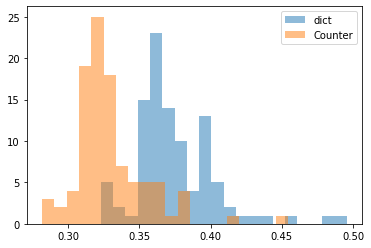

In [23]:
import matplotlib.pyplot as plt

# Plot the distribution of execution times for each method
plt.hist(list_dictionary, bins=20, alpha=0.5, label='dictionary')
plt.hist(list_counter, bins=20, alpha=0.5, label='Counter')
plt.legend(loc='upper right')
plt.show()

We can clearly see that counter is more efficient that the dictionay way.